<a href="https://colab.research.google.com/github/abubakar-zohaib1415/human12/blob/main/02_Browsing_Ai_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade --quiet -q -U langchain-community langchain-openai tavily-python langgraph google-cloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import START, END, StateGraph
from langgraph.graph.state import CompiledStateGraph
from tavily import TavilyClient
from typing_extensions import TypedDict
from google.colab import userdata
from langchain_core.messages.ai import AIMessage

In [ ]:
class MessageState(TypedDict):
  prompt : str
  output : str

In [ ]:
tavily = TavilyClient(api_key=userdata.get('TAVILY_API_KEY'))

In [ ]:
def Chatbot(state:MessageState):
  print("--- Chatbot ---", state)
  prompt = state['prompt']
  ai_msg : AIMessage = tavily.get_search_context(prompt)
  return {"output": ai_msg}

  greet_message =  Chatbot(MessageState(prompt="Hello I want a Bmw New Model in Karachi"))
  print(greet_message)

In [ ]:
from IPython.display import Image, display

builder: StateGraph = StateGraph(state_schema=MessageState)


builder.add_node("Chatbot", Chatbot)


builder.add_edge(START, "Chatbot")
builder.add_edge("Chatbot", END)


graph: CompiledStateGraph = builder.compile()

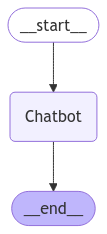

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
user_input = input("Welcome")
result = graph.invoke({"prompt" : f"{user_input}"})

WelcomeI want bmw
--- Chatbot --- {'prompt': 'I want bmw'}


In [ ]:
print(result.__dict__)

{}


In [ ]:
import pprint

# Pretty-print the entire result
pprint.pprint(result)

# If it's a dictionary, you can also do this:
pprint.pprint(result)  # Assuming result.query is a dictionary or a nested object


{'output': '"[\\"{\\\\\\"url\\\\\\": '
           '\\\\\\"https://www.billjacobsbmw.com/how-to-pre-order-your-bmw-from-the-factory/\\\\\\", '
           '\\\\\\"content\\\\\\": \\\\\\"2. Pre-Order Your BMW. After you '
           'select the BMW model you want, visit our dealership to pre-order '
           'your BMW. We will stay in touch with you after your BMW is '
           'ordered. After your BMW order is placed, we will walk you through '
           'how to track your BMW order. Your new BMW will arrive anywhere '
           'from 4 - 8 weeks, depending on the exact BMW you '
           'ordered.\\\\\\"}\\", \\"{\\\\\\"url\\\\\\": '
           '\\\\\\"https://www.bmwusa.com/\\\\\\", \\\\\\"content\\\\\\": '
           '\\\\\\"Explore models, build your own, and find local inventory '
           'from a nearby BMW Center. Experience the performance, luxury, and '
           'innovation of the Ultimate Driving Machine today.\\\\\\"}\\", '
           '\\"{\\\\\\"url\\\\\\": '
    